In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Image Intensity Viewer"),
    dcc.Upload(
        id='upload-image',
        children=html.Button('Upload Image'),
        multiple=False
    ),
    html.Div(id='output-image-upload')
])

# Callback for processing and displaying the image intensity
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents')]
)
def update_output(content):
    if content is not None:
        # Decode base64 image data
        content_type, content_string = content.split(',')
        decoded = base64.b64decode(content_string)
        img = Image.open(io.BytesIO(decoded))

        # Convert image to grayscale using OpenCV
        image_np = np.array(img)
        if len(image_np.shape) == 3 and image_np.shape[2] == 3:  # Check if the image is RGB
            image_gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        else:
            image_gray = image_np  # Image is already grayscale

        # Create a Plotly heatmap to show intensity values
        fig = go.Figure(data=go.Heatmap(
            z=image_gray,
            colorscale='Viridis'
        ))

        fig.update_layout(
            title='Intensity Map',
            xaxis=dict(visible=False),
            yaxis=dict(visible=False,autorange='reversed')
        )

        return dcc.Graph(figure=fig)

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


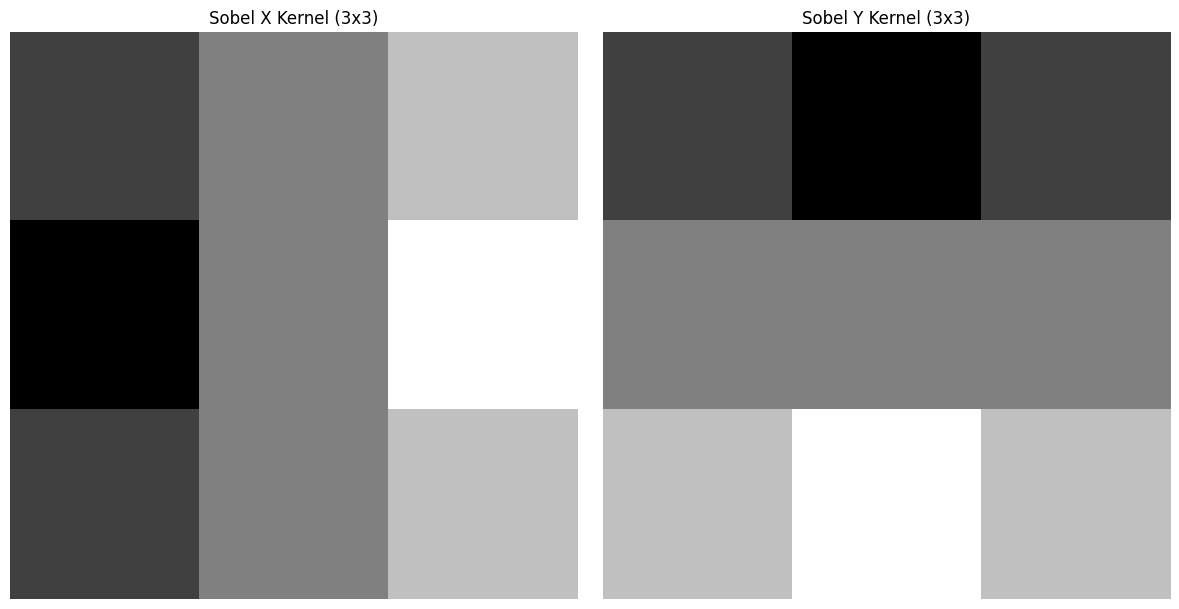

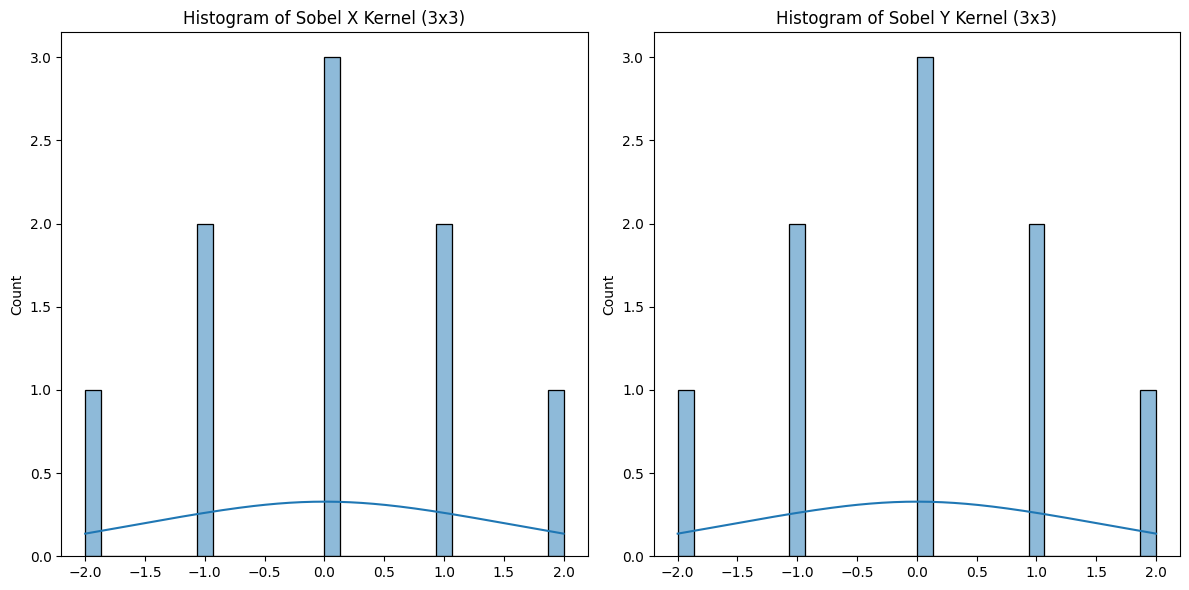

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Sobel 3x3 kernels
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_3x3 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Plot the Sobel X and Sobel Y kernels as images (3x3)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display Sobel X (3x3)
ax[0].imshow(sobel_x_3x3, cmap='gray', interpolation='nearest')
ax[0].set_title('Sobel X Kernel (3x3)')
ax[0].axis('off')

# Display Sobel Y (3x3)
ax[1].imshow(sobel_y_3x3, cmap='gray', interpolation='nearest')
ax[1].set_title('Sobel Y Kernel (3x3)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Plot the histograms of the Sobel X and Sobel Y kernels (3x3)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for Sobel X (3x3)
sns.histplot(sobel_x_3x3.flatten(), kde=True, bins=30, ax=ax[0])
ax[0].set_title('Histogram of Sobel X Kernel (3x3)')

# Plot histogram for Sobel Y (3x3)
sns.histplot(sobel_y_3x3.flatten(), kde=True, bins=30, ax=ax[1])
ax[1].set_title('Histogram of Sobel Y Kernel (3x3)')

plt.tight_layout()
plt.show()


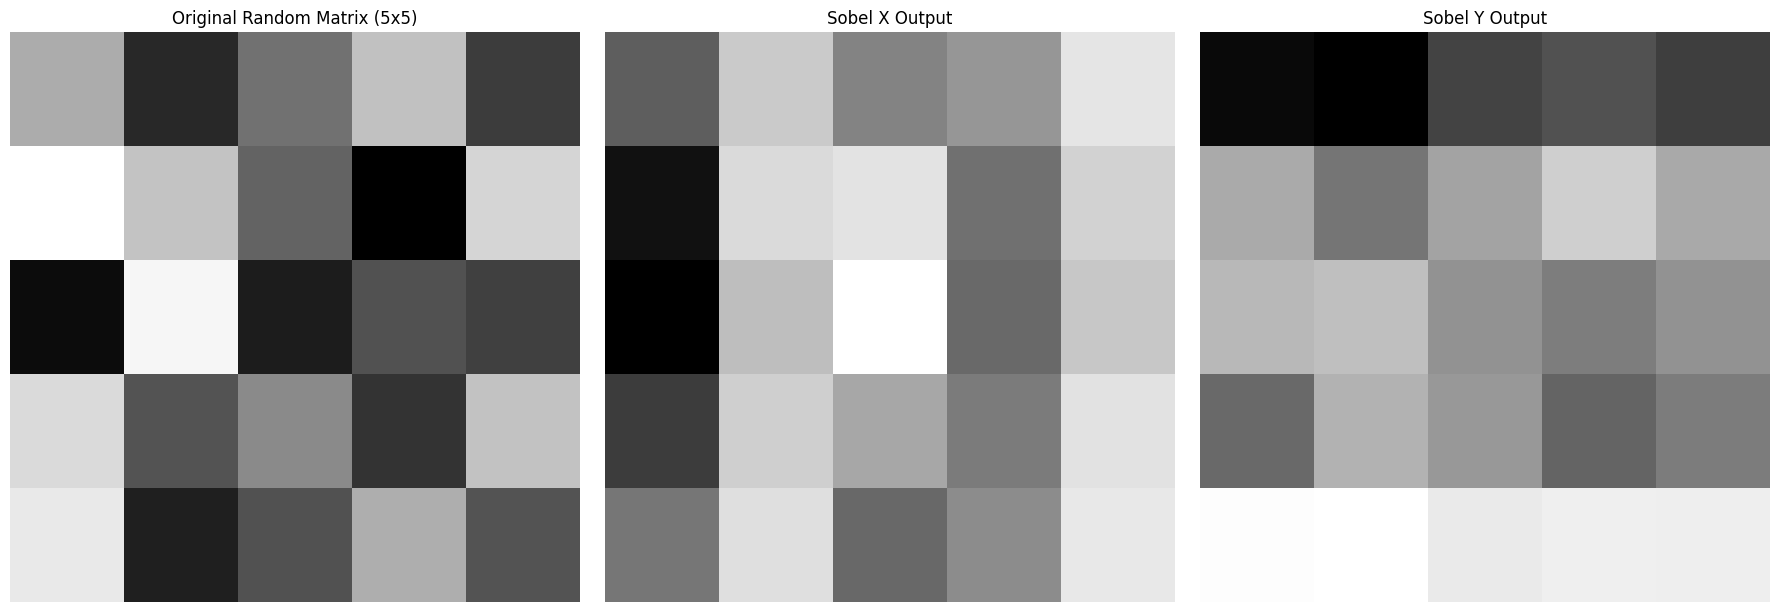

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import convolve

# Define the Sobel 3x3 kernels
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_3x3 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Generate a random 5x5 matrix
np.random.seed(0)  # For reproducibility
random_matrix = np.random.randint(0, 256, size=(5, 5))

# Perform convolution with Sobel X and Sobel Y kernels
sobel_x_output = convolve(random_matrix, sobel_x_3x3, mode='constant', cval=0.0)
sobel_y_output = convolve(random_matrix, sobel_y_3x3, mode='constant', cval=0.0)

# Plot the original random matrix and Sobel output matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the random 5x5 matrix
ax[0].imshow(random_matrix, cmap='gray', interpolation='nearest')
ax[0].set_title('Original Random Matrix (5x5)')
ax[0].axis('off')

# Plot the Sobel X output
ax[1].imshow(sobel_x_output, cmap='gray', interpolation='nearest')
ax[1].set_title('Sobel X Output')
ax[1].axis('off')

# Plot the Sobel Y output
ax[2].imshow(sobel_y_output, cmap='gray', interpolation='nearest')
ax[2].set_title('Sobel Y Output')
ax[2].axis('off')

plt.tight_layout()
plt.show()


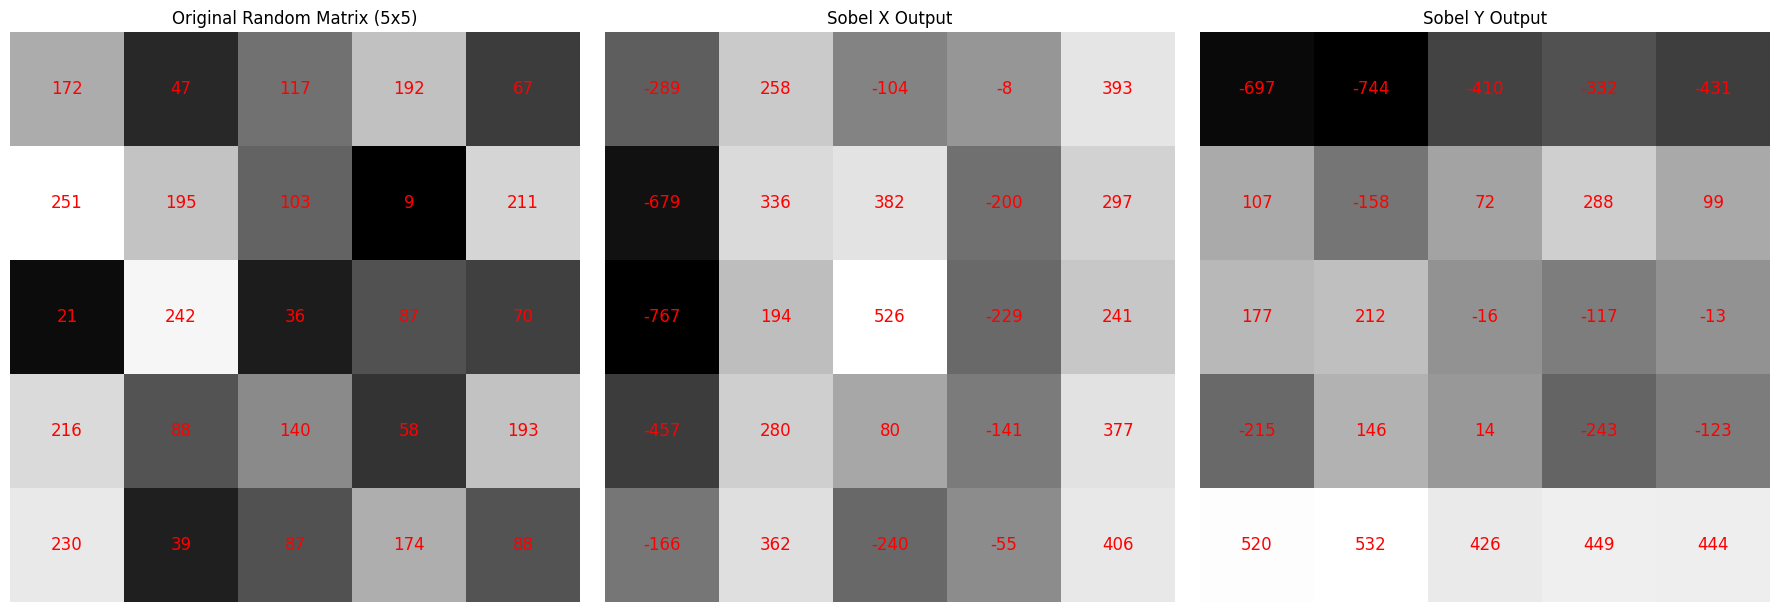

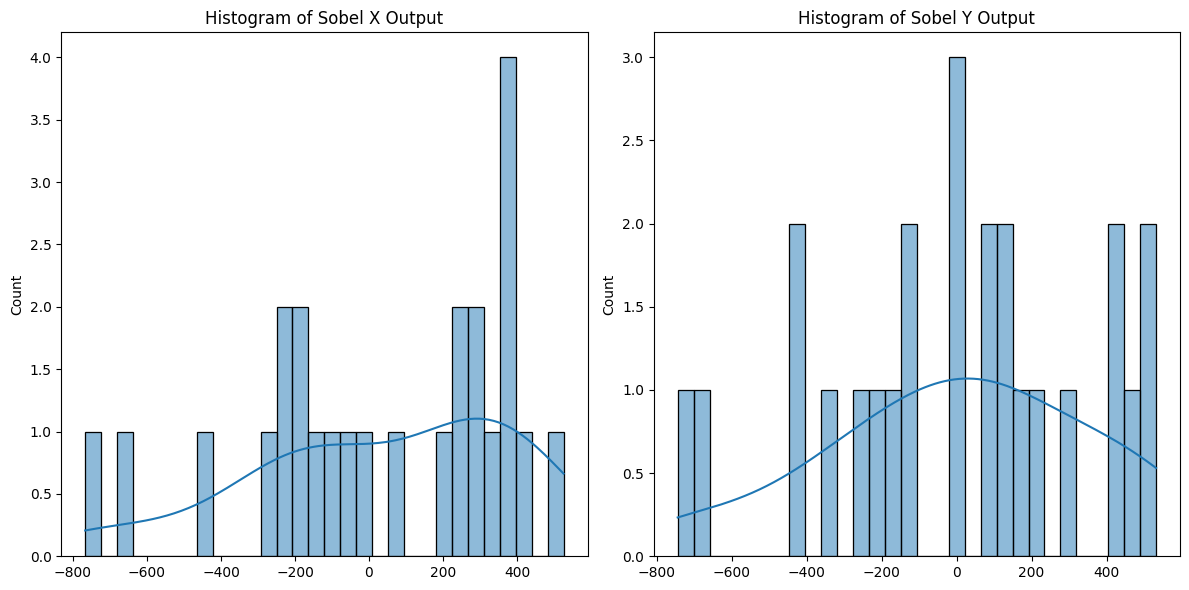

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import convolve

# Define the Sobel 3x3 kernels
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_3x3 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Generate a random 5x5 matrix
np.random.seed(0)  # For reproducibility
random_matrix = np.random.randint(0, 256, size=(5, 5))

# Perform convolution with Sobel X and Sobel Y kernels
sobel_x_output = convolve(random_matrix, sobel_x_3x3, mode='constant', cval=0.0)
sobel_y_output = convolve(random_matrix, sobel_y_3x3, mode='constant', cval=0.0)

# Plot the original random matrix and Sobel output matrices with values in grid
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Function to display the values in grid
def display_values_in_grid(matrix, ax):
    ax.imshow(matrix, cmap='gray', interpolation='nearest')
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val}', ha='center', va='center', color='red', fontsize=12)
        ax.axis('off')

# Plot the random 5x5 matrix with values
ax[0].set_title('Original Random Matrix (5x5)')
display_values_in_grid(random_matrix, ax[0])

# Plot the Sobel X output with values
ax[1].set_title('Sobel X Output')
display_values_in_grid(sobel_x_output, ax[1])

# Plot the Sobel Y output with values
ax[2].set_title('Sobel Y Output')
display_values_in_grid(sobel_y_output, ax[2])

plt.tight_layout()
plt.show()

# Plot the histograms of the Sobel X and Sobel Y output matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for Sobel X output
sns.histplot(sobel_x_output.flatten(), kde=True, bins=30, ax=ax[0])
ax[0].set_title('Histogram of Sobel X Output')

# Plot histogram for Sobel Y output
sns.histplot(sobel_y_output.flatten(), kde=True, bins=30, ax=ax[1])
ax[1].set_title('Histogram of Sobel Y Output')

plt.tight_layout()
plt.show()


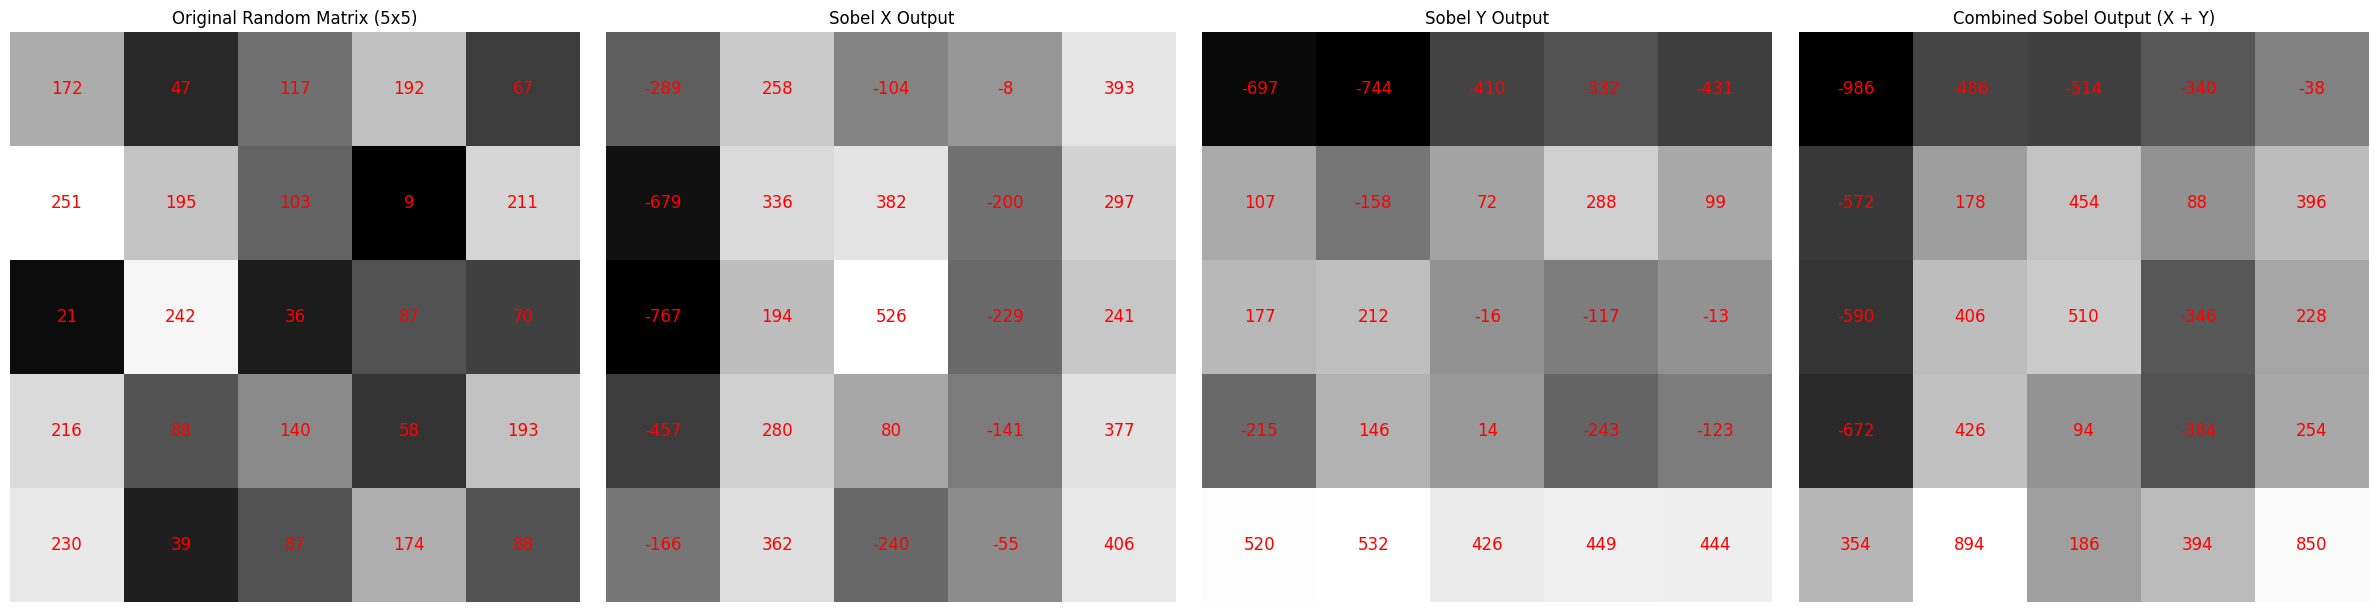

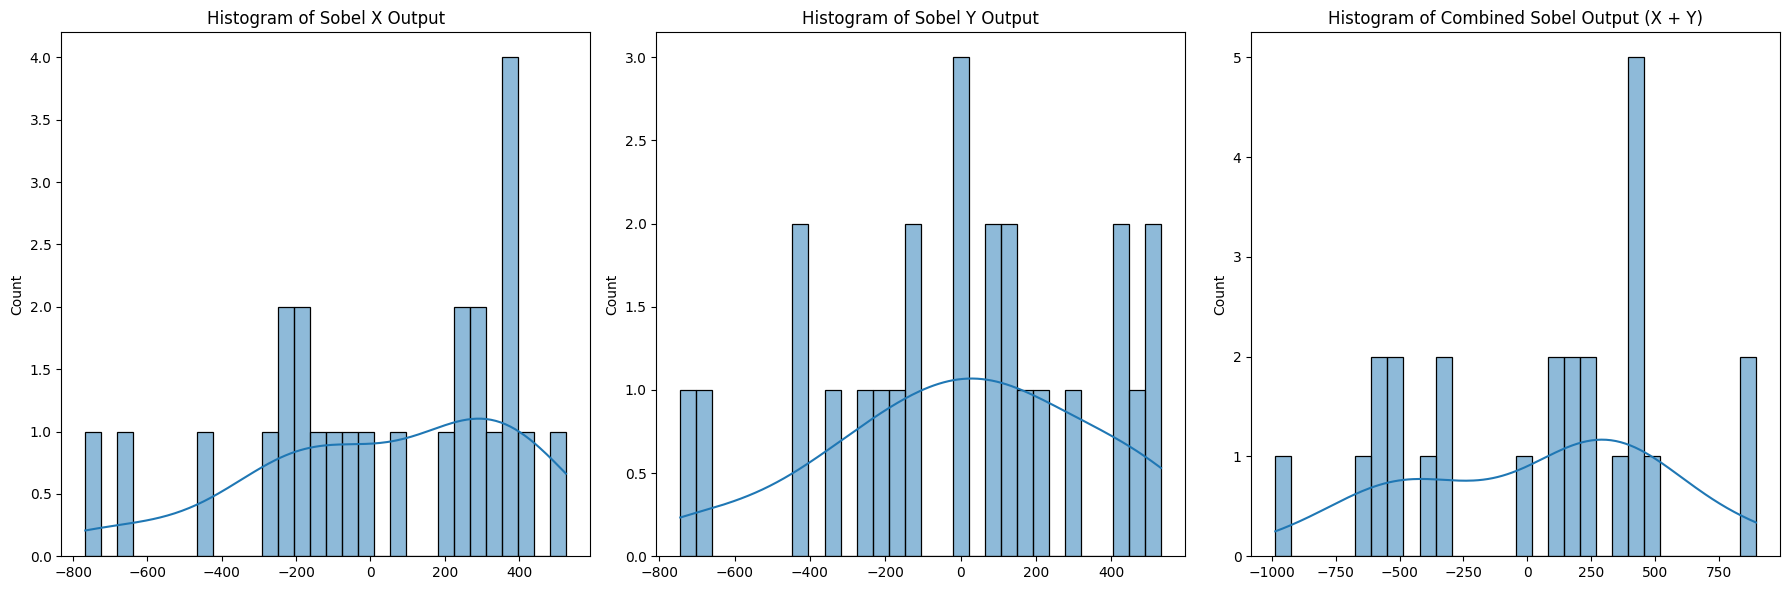

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import convolve

# Define the Sobel 3x3 kernels
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_3x3 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Generate a random 5x5 matrix
np.random.seed(0)  # For reproducibility
random_matrix = np.random.randint(0, 256, size=(5, 5))

# Perform convolution with Sobel X and Sobel Y kernels
sobel_x_output = convolve(random_matrix, sobel_x_3x3, mode='constant', cval=0.0)
sobel_y_output = convolve(random_matrix, sobel_y_3x3, mode='constant', cval=0.0)

# Add the Sobel X and Sobel Y outputs
combined_output = sobel_x_output + sobel_y_output

# Plot the original random matrix and Sobel output matrices with values in grid
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# Function to display the values in grid
def display_values_in_grid(matrix, ax):
    ax.imshow(matrix, cmap='gray', interpolation='nearest')
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val}', ha='center', va='center', color='red', fontsize=12)
    ax.axis('off')

# Plot the random 5x5 matrix with values
ax[0].set_title('Original Random Matrix (5x5)')
display_values_in_grid(random_matrix, ax[0])

# Plot the Sobel X output with values
ax[1].set_title('Sobel X Output')
display_values_in_grid(sobel_x_output, ax[1])

# Plot the Sobel Y output with values
ax[2].set_title('Sobel Y Output')
display_values_in_grid(sobel_y_output, ax[2])

# Plot the combined Sobel output with values
ax[3].set_title('Combined Sobel Output (X + Y)')
display_values_in_grid(combined_output, ax[3])

plt.tight_layout()
plt.show()

# Plot the histograms of the Sobel X, Sobel Y, and combined output matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for Sobel X output
sns.histplot(sobel_x_output.flatten(), kde=True, bins=30, ax=ax[0])
ax[0].set_title('Histogram of Sobel X Output')

# Plot histogram for Sobel Y output
sns.histplot(sobel_y_output.flatten(), kde=True, bins=30, ax=ax[1])
ax[1].set_title('Histogram of Sobel Y Output')

# Plot histogram for combined Sobel output
sns.histplot(combined_output.flatten(), kde=True, bins=30, ax=ax[2])
ax[2].set_title('Histogram of Combined Sobel Output (X + Y)')

plt.tight_layout()
plt.show()


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Image Intensity and Gaussian Function Viewer"),

    html.Div(id='output-image-upload'),
    html.H2("Adjust Gaussian Standard Deviation"),
    dcc.Slider(
        id='std-dev-slider',
        min=0.5,
        max=10,
        step=0.1,
        value=1,
        marks={i: str(i) for i in range(1, 11)}
    ),
    dcc.Graph(id='gaussian-graph')
])

# Callback for processing and displaying the image intensity
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents')]
)
def update_output(content):
    if content is not None:
        # Decode base64 image data
        content_type, content_string = content.split(',')
        decoded = base64.b64decode(content_string)
        img = Image.open(io.BytesIO(decoded))

        # Convert image to grayscale using OpenCV
        image_np = np.array(img)
        if len(image_np.shape) == 3 and image_np.shape[2] == 3:  # Check if the image is RGB
            image_gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        else:
            image_gray = image_np  # Image is already grayscale

        # Create a Plotly heatmap to show intensity values
        fig = go.Figure(data=go.Heatmap(
            z=image_gray,
            colorscale='Viridis'
        ))

        fig.update_layout(
            title='Intensity Map',
            xaxis=dict(visible=False),
            yaxis=dict(visible=False, autorange='reversed')
        )

        return dcc.Graph(figure=fig)

# Callback for updating the Gaussian function plot based on standard deviation
@app.callback(
    Output('gaussian-graph', 'figure'),
    [Input('std-dev-slider', 'value')]
)
def update_gaussian_plot(std_dev):
    # Generate a Gaussian distribution
    x = np.linspace(-10, 10, 400)
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x / std_dev) ** 2)

    # Create a Plotly line chart to display the Gaussian function
    fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))
    fig.update_layout(
        title=f'Gaussian Distribution (Std Dev = {std_dev})',
        xaxis_title='X',
        yaxis_title='Probability Density',
        xaxis=dict(zeroline=False),
        yaxis=dict(zeroline=False)
    )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Image Intensity and Gaussian Function Viewer"),
    dcc.Upload(
        id='upload-image',
        children=html.Button('Upload Image'),
        multiple=False
    ),
    html.Div(id='output-image-upload'),
    html.H2("Adjust Gaussian Standard Deviation"),
    dcc.Slider(
        id='std-dev-slider',
        min=0.5,
        max=10,
        step=0.1,
        value=1,
        marks={i: str(i) for i in range(1, 11)}
    ),
    dcc.Graph(id='gaussian-graph')
])

# Callback for processing and displaying the image intensity
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents')]
)
def update_output(content):
    if content is not None:
        # Decode base64 image data
        content_type, content_string = content.split(',')
        decoded = base64.b64decode(content_string)
        img = Image.open(io.BytesIO(decoded))

        # Convert image to grayscale using OpenCV
        image_np = np.array(img)
        if len(image_np.shape) == 3 and image_np.shape[2] == 3:  # Check if the image is RGB
            image_gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        else:
            image_gray = image_np  # Image is already grayscale

        # Create a Plotly heatmap to show intensity values
        fig = go.Figure(data=go.Heatmap(
            z=image_gray,
            colorscale='Viridis'
        ))

        fig.update_layout(
            title='Intensity Map',
            xaxis=dict(visible=False),
            yaxis=dict(visible=False, autorange='reversed')
        )

        return dcc.Graph(figure=fig)

# Callback for updating the 3D Gaussian function plot based on standard deviation
@app.callback(
    Output('gaussian-graph', 'figure'),
    [Input('std-dev-slider', 'value')]
)
def update_gaussian_plot(std_dev):
    # Generate a 3D Gaussian distribution
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    x, y = np.meshgrid(x, y)
    z = (1 / (2 * np.pi * std_dev ** 2)) * np.exp(-0.5 * ((x ** 2 + y ** 2) / std_dev ** 2))

    # Create a Plotly 3D surface chart
    fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
    fig.update_layout(
        title=f'3D Gaussian Distribution (Std Dev = {std_dev})',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Probability Density',
            xaxis=dict(zeroline=False),
            yaxis=dict(zeroline=False),
            zaxis=dict(zeroline=False)
        )
    )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Function to create a Gaussian kernel
def create_gaussian_kernel(size, std_dev):
    # Generate a 2D Gaussian kernel
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    kernel = (1 / (2 * np.pi * std_dev ** 2)) * np.exp(-0.5 * (x ** 2 + y ** 2) / std_dev ** 2)
    return kernel

# App layout
app.layout = html.Div([
    html.H1("Gaussian Kernels Viewer"),
    dcc.Dropdown(
        id='kernel-size-dropdown',
        options=[
            {'label': '3x3 Kernel', 'value': 3},
            {'label': '5x5 Kernel', 'value': 5},
            {'label': '7x7 Kernel', 'value': 7}
        ],
        value=3,
        placeholder="Select a kernel size"
    ),
    dcc.Graph(id='gaussian-kernel-graph')
])

# Callback for updating the 3D Gaussian kernel plot based on selected size
@app.callback(
    Output('gaussian-kernel-graph', 'figure'),
    [Input('kernel-size-dropdown', 'value')]
)
def update_kernel_plot(kernel_size):
    std_dev = 1.0  # Standard deviation for all kernels
    kernel = create_gaussian_kernel(kernel_size, std_dev)

    # Create a 3D surface plot of the kernel
    x = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    y = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    x, y = np.meshgrid(x, y)

    fig = go.Figure(data=[go.Surface(z=kernel, x=x, y=y)])
    fig.update_layout(
        title=f'{kernel_size}x{kernel_size} Gaussian Kernel (Std Dev = {std_dev})',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Kernel Value',
            xaxis=dict(zeroline=False),
            yaxis=dict(zeroline=False),
            zaxis=dict(zeroline=False)
        )
    )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Function to create a Gaussian kernel
def create_gaussian_kernel(size, std_dev):
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    kernel = (1 / (2 * np.pi * std_dev ** 2)) * np.exp(-0.5 * (x ** 2 + y ** 2) / std_dev ** 2)
    return kernel

# App layout
app.layout = html.Div([
    html.H1("Gaussian Kernels Viewer"),

    html.Label("Select Kernel Size:"),
    dcc.Dropdown(
        id='kernel-size-dropdown',
        options=[
            {'label': '3x3 Kernel', 'value': 3},
            {'label': '5x5 Kernel', 'value': 5},
            {'label': '7x7 Kernel', 'value': 7},
            {'label': '11x11 Kernel', 'value': 11}
        ],
        value=4,
        placeholder="Select a kernel size"
    ),

    html.Label("Adjust Standard Deviation:"),
    dcc.Slider(
        id='std-dev-slider',
        min=0.5,
        max=5,
        step=0.1,
        value=1,
        marks={i: str(i) for i in range(1, 6)}
    ),

    dcc.Graph(id='gaussian-kernel-graph')
])

# Callback for updating the 3D Gaussian kernel plot based on selected size and standard deviation
@app.callback(
    Output('gaussian-kernel-graph', 'figure'),
    [Input('kernel-size-dropdown', 'value'), Input('std-dev-slider', 'value')]
)
def update_kernel_plot(kernel_size, std_dev):
    kernel = create_gaussian_kernel(kernel_size, std_dev)

    # Create a 3D surface plot of the kernel
    x = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    y = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    x, y = np.meshgrid(x, y)

    fig = go.Figure(data=[go.Surface(z=kernel, x=x, y=y)])
    fig.update_layout(
        title=f'{kernel_size}x{kernel_size} Gaussian Kernel (Std Dev = {std_dev})',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Kernel Value',
            xaxis=dict(zeroline=False),
            yaxis=dict(zeroline=False),
            zaxis=dict(zeroline=False)
        )
    )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Function to create a Gaussian kernel
def create_gaussian_kernel(size, std_dev):
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    kernel = (1 / (2 * np.pi * std_dev ** 2)) * np.exp(-0.5 * (x ** 2 + y ** 2) / std_dev ** 2)
    return kernel

# App layout
app.layout = html.Div([
    html.H1("Gaussian Kernels Viewer"),

    html.Label("Select Kernel Size:"),
    dcc.Dropdown(
        id='kernel-size-dropdown',
        options=[
            {'label': '3x3 Kernel', 'value': 3},
            {'label': '5x5 Kernel', 'value': 5},
            {'label': '7x7 Kernel', 'value': 7},
            {'label': '11x11 Kernel', 'value': 11}
        ],
        value=3  # Default value should match one of the available options
    ),

    html.Label("Adjust Standard Deviation:"),
    dcc.Slider(
        id='std-dev-slider',
        min=0.5,
        max=5,
        step=0.1,
        value=1,
        marks={i: str(i) for i in range(1, 6)}
    ),

    dcc.Graph(id='gaussian-kernel-graph')
])

# Callback for updating the 3D Gaussian kernel plot based on selected size and standard deviation
@app.callback(
    Output('gaussian-kernel-graph', 'figure'),
    [Input('kernel-size-dropdown', 'value'), Input('std-dev-slider', 'value')]
)
def update_kernel_plot(kernel_size, std_dev):
    if kernel_size is None or kernel_size < 3:
        kernel_size = 3  # Ensure a valid kernel size

    kernel = create_gaussian_kernel(kernel_size, std_dev)

    # Create a 3D surface plot of the kernel
    x = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    y = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    x, y = np.meshgrid(x, y)

    fig = go.Figure(data=[go.Surface(z=kernel, x=x, y=y)])
    fig.update_layout(
        title=f'{kernel_size}x{kernel_size} Gaussian Kernel (Std Dev = {std_dev})',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Kernel Value',
            xaxis=dict(zeroline=False),
            yaxis=dict(zeroline=False),
            zaxis=dict(zeroline=False)
        )
    )

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Function to create a Gaussian kernel
def create_gaussian_kernel(size, std_dev):
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    kernel = (1 / (2 * np.pi * std_dev ** 2)) * np.exp(-0.5 * (x ** 2 + y ** 2) / std_dev ** 2)
    return kernel

# App layout
app.layout = html.Div([
    html.H1("Gaussian Kernels Viewer"),

    html.Label("Select Kernel Size:"),
    dcc.Dropdown(
        id='kernel-size-dropdown',
        options=[
            {'label': '3x3 Kernel', 'value': 3},
            {'label': '5x5 Kernel', 'value': 5},
            {'label': '7x7 Kernel', 'value': 7},
            {'label': '11x11 Kernel', 'value': 11}
        ],
        value=3  # Default value
    ),

    html.Label("Adjust Standard Deviation:"),
    dcc.Slider(
        id='std-dev-slider',
        min=0.5,
        max=5,
        step=0.1,
        value=1,
        marks={i: str(i) for i in range(1, 6)}
    ),

    dcc.Graph(id='gaussian-kernel-graph'),
    dcc.Graph(id='kernel-grid-graph')
])

# Callback for updating the 3D Gaussian kernel plot and 2D grid with values
@app.callback(
    [Output('gaussian-kernel-graph', 'figure'), Output('kernel-grid-graph', 'figure')],
    [Input('kernel-size-dropdown', 'value'), Input('std-dev-slider', 'value')]
)
def update_kernel_plots(kernel_size, std_dev):
    if kernel_size is None or kernel_size < 3:
        kernel_size = 3  # Ensure a valid kernel size

    kernel = create_gaussian_kernel(kernel_size, std_dev)

    # Create a 3D surface plot of the kernel
    x = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    y = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    x, y = np.meshgrid(x, y)

    fig_3d = go.Figure(data=[go.Surface(z=kernel, x=x, y=y)])
    fig_3d.update_layout(
        title=f'{kernel_size}x{kernel_size} Gaussian Kernel (Std Dev = {std_dev})',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Kernel Value',
            xaxis=dict(zeroline=False),
            yaxis=dict(zeroline=False),
            zaxis=dict(zeroline=False)
        )
    )

    # Create a 2D heatmap plot of the kernel with values annotated
    fig_2d = go.Figure(data=go.Heatmap(
        z=kernel,
        text=[[f"{val:.3f}" for val in row] for row in kernel],
        texttemplate="%{text}",
        colorscale='Viridis',
        showscale=True
    ))
    fig_2d.update_layout(
        title=f'{kernel_size}x{kernel_size} Kernel Values (Std Dev = {std_dev})',
        xaxis=dict(visible=True, title='Column Index'),
        yaxis=dict(visible=True, title='Row Index')
    )

    return fig_3d, fig_2d

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


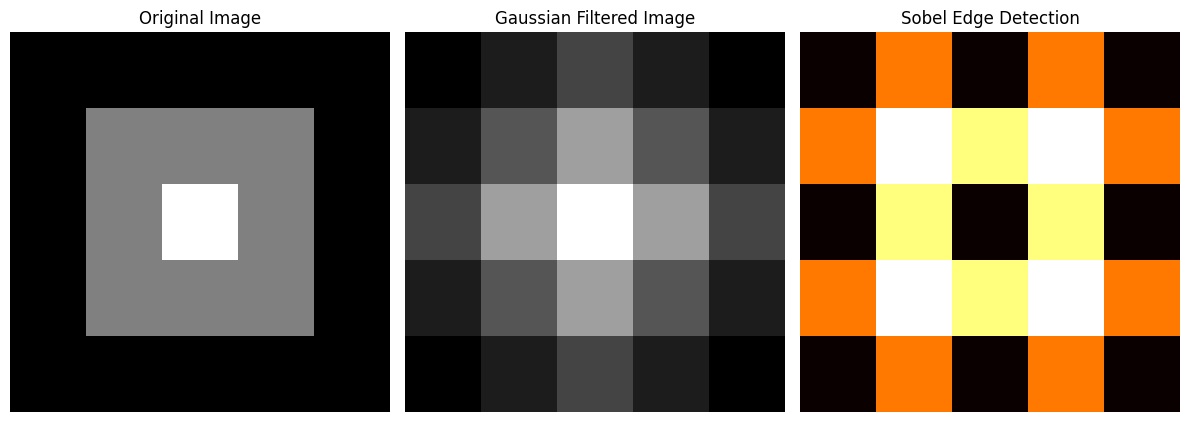

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a 5x5 grayscale image (example image)
image = np.array([
    [100, 100, 100, 100, 100],
    [100, 150, 150, 150, 100],
    [100, 150, 200, 150, 100],
    [100, 150, 150, 150, 100],
    [100, 100, 100, 100, 100]
], dtype=np.uint8)

# Step 1: Apply Gaussian filter to smooth the image
gaussian_filtered = cv2.GaussianBlur(image, (3, 3), 1)

# Step 2: Apply Sobel filter to detect edges
sobel_x = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

# Compute gradient magnitude
sobel_mag = cv2.magnitude(sobel_x, sobel_y)

# Plot the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gaussian filtered image
plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

# Sobel edge detection result
plt.subplot(1, 3, 3)
plt.imshow(sobel_mag, cmap='hot')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


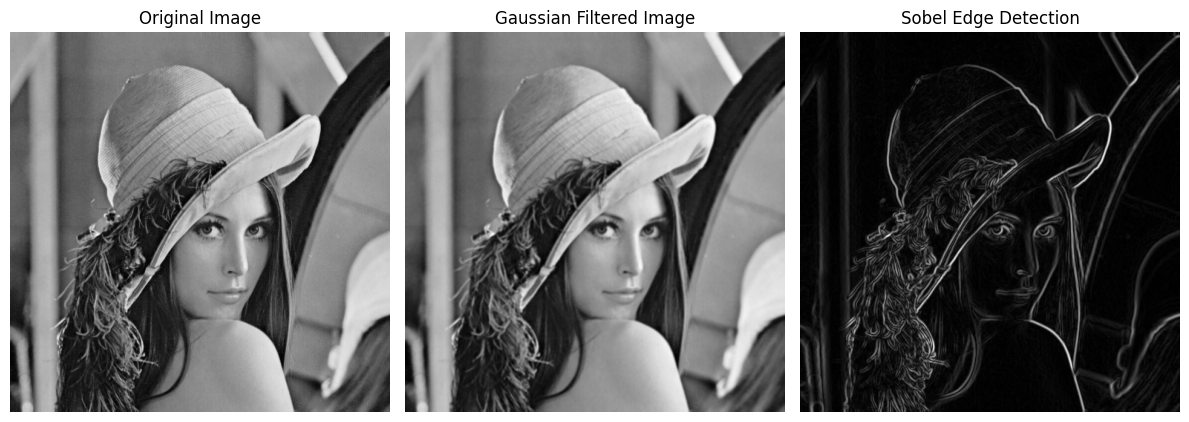

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image (make sure to update the path to an image on your system)
image = cv2.imread(r'C:\Users\DELL\Downloads\Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Step 1: Apply Gaussian filter to smooth the image
gaussian_filtered = cv2.GaussianBlur(image, (3, 3), 1)

# Step 2: Apply Sobel filter to detect edges
sobel_x = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

# Compute gradient magnitude
sobel_mag = cv2.magnitude(sobel_x, sobel_y)

# Plot the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gaussian filtered image
plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

# Sobel edge detection result
plt.subplot(1, 3, 3)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Generate a complex 3D function
def complex_function(x, y):
    return np.sin(x) * np.cos(y)

# Apply Gaussian filter to smooth the function
def apply_gaussian_filter(data, sigma=1):
    return gaussian_filter(data, sigma=sigma)

# 3D Surface plot
def create_3d_surface_plot(x, y, z):
    return go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Create layout for the Dash app
app.layout = html.Div([
    html.H1("Gaussian Filter Simulation"),

    dcc.Slider(
        id='sigma-slider',
        min=1,
        max=10,
        step=0.1,
        value=1,
        marks={i: str(i) for i in range(1, 11)},
        tooltip={"placement": "bottom", "always_visible": True},
    ),

    dcc.Graph(id='3d-plot'),

    html.Hr(),

    html.H3("Upload Image for Gaussian Filtering"),
    dcc.Upload(
        id='upload-image',
        children=html.Button('Upload Image'),
        multiple=False
    ),

    html.Div(id='output-image-upload'),
])

# Update the 3D plot based on the sigma value of the Gaussian filter
@app.callback(
    Output('3d-plot', 'figure'),
    [Input('sigma-slider', 'value')]
)
def update_3d_plot(sigma):
    # Create a meshgrid for plotting the 3D function
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = complex_function(x, y)

    # Apply Gaussian filter
    z_smooth = apply_gaussian_filter(z, sigma)

    # Create and return the figure
    return create_3d_surface_plot(x, y, z_smooth)

# Image upload and Gaussian filter application
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents')]
)
def update_image(input_image):
    if input_image is not None:
        # Decode and read the image
        content_type, content_string = input_image.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        img_array = np.array(image)

        # Apply Gaussian filter to the image
        smoothed_img = gaussian_filter(img_array, sigma=2)

        # Convert back to image for displaying
        smoothed_pil_image = Image.fromarray(smoothed_img.astype(np.uint8))
        buffered = io.BytesIO()
        smoothed_pil_image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        return html.Img(src=f"data:image/png;base64,{img_str}")

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Generate a complex 3D function
def complex_function(x, y):
    return np.sin(x) * np.cos(y)

# Apply Gaussian filter to smooth the function
def apply_gaussian_filter(data, sigma=1):
    return gaussian_filter(data, sigma=sigma)

# 3D Surface plot
def create_3d_surface_plot(x, y, z):
    return go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Create layout for the Dash app
app.layout = html.Div([
    html.H1("Gaussian Filter Simulation"),

    # Row 1: Slider for adjusting sigma
    html.Div([
        dcc.Slider(
            id='sigma-slider',
            min=1,
            max=10,
            step=0.1,
            value=1,
            marks={i: str(i) for i in range(1, 11)},
            tooltip={"placement": "bottom", "always_visible": True},
        ),
    ], style={'width': '80%', 'margin': '0 auto'}),

    # Row 2: Display 3D plot and Image upload side by side
    html.Div([
        # Column 1: 3D plot
        html.Div([
            dcc.Graph(id='3d-plot'),
        ], style={'width': '48%', 'display': 'inline-block'}),

        # Column 2: Image upload and filter result
        html.Div([
            html.H3("Upload Image for Gaussian Filtering"),
            dcc.Upload(
                id='upload-image',
                children=html.Button('Upload Image'),
                multiple=False
            ),
            html.Div(id='output-image-upload'),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
])

# Update the 3D plot based on the sigma value of the Gaussian filter
@app.callback(
    Output('3d-plot', 'figure'),
    [Input('sigma-slider', 'value')]
)
def update_3d_plot(sigma):
    # Create a meshgrid for plotting the 3D function
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = complex_function(x, y)

    # Apply Gaussian filter
    z_smooth = apply_gaussian_filter(z, sigma)

    # Create and return the figure
    return create_3d_surface_plot(x, y, z_smooth)

# Image upload and Gaussian filter application
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents')]
)
def update_image(input_image):
    if input_image is not None:
        # Decode and read the image
        content_type, content_string = input_image.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        img_array = np.array(image)

        # Apply Gaussian filter to the image
        smoothed_img = gaussian_filter(img_array, sigma=2)

        # Convert back to image for displaying
        smoothed_pil_image = Image.fromarray(smoothed_img.astype(np.uint8))
        buffered = io.BytesIO()
        smoothed_pil_image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        return html.Img(src=f"data:image/png;base64,{img_str}")

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Generate a complex 3D function
def complex_function(x, y):
    return np.sin(x) * np.cos(y)

# Apply Gaussian filter to smooth the function
def apply_gaussian_filter(data, sigma=1):
    return gaussian_filter(data, sigma=sigma)

# 3D Surface plot
def create_3d_surface_plot(x, y, z):
    return go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Create layout for the Dash app
app.layout = html.Div([
    html.H1("Gaussian Filter Simulation"),

    # Row 1: Slider for adjusting sigma
    html.Div([
        dcc.Slider(
            id='sigma-slider',
            min=1,
            max=10,
            step=0.1,
            value=1,
            marks={i: str(i) for i in range(1, 11)},
            tooltip={"placement": "bottom", "always_visible": True},
        ),
    ], style={'width': '80%', 'margin': '0 auto'}),

    # Row 2: Display 3D plot and Image upload side by side
    html.Div([
        # Column 1: 3D plot
        html.Div([
            dcc.Graph(id='3d-plot'),
        ], style={'width': '48%', 'display': 'inline-block'}),

        # Column 2: Image upload and filter result
        html.Div([
            html.H3("Upload Image for Gaussian Filtering"),
            dcc.Upload(
                id='upload-image',
                children=html.Button('Upload Image'),
                multiple=False
            ),
            html.Div(id='output-image-upload'),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
])

# Update the 3D plot based on the sigma value of the Gaussian filter
@app.callback(
    Output('3d-plot', 'figure'),
    [Input('sigma-slider', 'value')]
)
def update_3d_plot(sigma):
    # Create a meshgrid for plotting the 3D function
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = complex_function(x, y)

    # Apply Gaussian filter
    z_smooth = apply_gaussian_filter(z, sigma)

    # Create and return the figure
    return create_3d_surface_plot(x, y, z_smooth)

# Image upload and Gaussian filter application
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents'),
     Input('sigma-slider', 'value')]
)
def update_image(input_image, sigma):
    if input_image is not None:
        # Decode and read the image
        content_type, content_string = input_image.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        img_array = np.array(image)

        # Apply Gaussian filter to the image with the selected sigma value
        smoothed_img = gaussian_filter(img_array, sigma=sigma)

        # Convert back to image for displaying
        smoothed_pil_image = Image.fromarray(smoothed_img.astype(np.uint8))
        buffered = io.BytesIO()
        smoothed_pil_image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        return html.Img(src=f"data:image/png;base64,{img_str}")

if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~\AppData\Local\Programs\Python\Python311\Lib\site-packages\dash\dash.py:1301, in Dash.dispatch(self=<dash.dash.Dash object>)
   1300 try:
-> 1301     cb = self.callback_map[output]
        output = '..gaussian-kernel-graph.figure...kernel-grid-graph.figure..'
        self.callback_map = {'3d-plot.figure': {'inputs': [{'id': 'sigma-slider', 'property': 'value'}], 'state': [], 'outputs_indices': 0, 'inputs_state_indices': 0, 'long': None, 'output': <Output `3d-plot.figure`>, 'raw_inputs': [<Input `sigma-slider.value`>], 'manager': None, 'allow_dynamic_callbacks': None, 'no_output': False, 'callback': <function update_3d_plot at 0x000002099872EAC0>}, 'output-image-upload.children': {'inputs': [{'id': 'upload-image', 'property': 'contents'}, {'id': 'sigma-slider', 'property': 'value'}], 'state': [], 'outputs_indices': 0, 'inputs_state

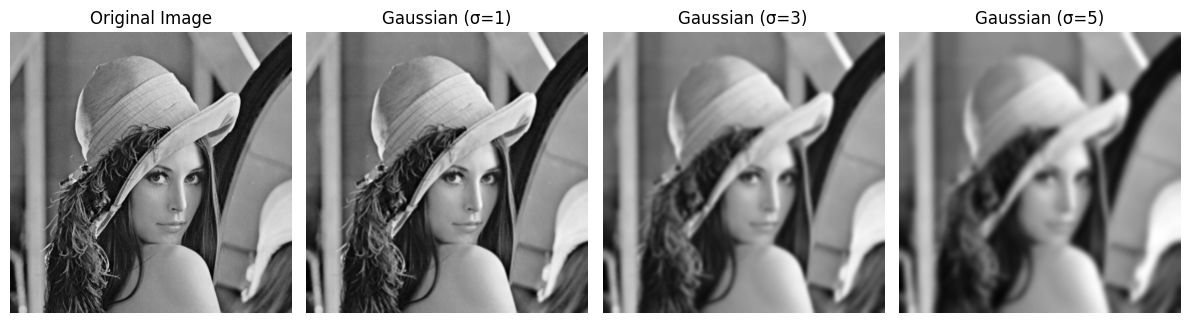

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Gaussian filter with a specific standard deviation
def apply_gaussian_filter(image, sigma):
    # Apply Gaussian blur (the kernel size is chosen to be 6 times the sigma value)
    kernel_size = int(6 * sigma + 1) | 1  # Ensures that the kernel size is odd
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return blurred_image

# Load an example image
image = cv2.imread(r'C:\Users\DELL\Downloads\Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Standard deviations to test
sigma_values = [1, 3, 5]

# Plot original image and images after applying Gaussian filter with different sigmas
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, len(sigma_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot images after applying Gaussian filter with different sigmas
for i, sigma in enumerate(sigma_values):
    blurred_image = apply_gaussian_filter(image, sigma)
    plt.subplot(1, len(sigma_values) + 1, i + 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title(f'Gaussian (σ={sigma})')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Generate a complex 3D function
def complex_function(x, y):
    return np.sin(x) * np.cos(y)

# Apply Gaussian filter to smooth the function
def apply_gaussian_filter(data, sigma=1):
    return gaussian_filter(data, sigma=sigma)

# 3D Surface plot
def create_3d_surface_plot(x, y, z):
    return go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Create layout for the Dash app
app.layout = html.Div([
    html.H1("Gaussian Filter Simulation"),

    # Row 1: Sliders for adjusting sigma and standard deviation
    html.Div([
        html.Div([
            dcc.Slider(
                id='sigma-slider',
                min=1,
                max=10,
                step=0.1,
                value=1,
                marks={i: str(i) for i in range(1, 11)},
                tooltip={"placement": "bottom", "always_visible": True}
            ),
        ], style={'width': '45%', 'display': 'inline-block', 'margin': '0 auto'}),

        html.Div([
            dcc.Slider(
                id='stddev-slider',
                min=1,
                max=10,
                step=0.1,
                value=1,
                marks={i: str(i) for i in range(1, 11)},
                tooltip={"placement": "bottom", "always_visible": True}
            ),
        ], style={'width': '45%', 'display': 'inline-block', 'margin': '0 auto'}),
    ], style={'display': 'flex', 'justify-content': 'space-between', 'margin-bottom': '20px'}),

    # Row 2: Display 3D plot and Image upload side by side
    html.Div([
        # Column 1: 3D plot
        html.Div([
            dcc.Graph(id='3d-plot'),
        ], style={'width': '48%', 'display': 'inline-block'}),

        # Column 2: Image upload and filter result
        html.Div([
            html.H3("Upload Image for Gaussian Filtering"),
            dcc.Upload(
                id='upload-image',
                children=html.Button('Upload Image'),
                multiple=False
            ),
            html.Div(id='output-image-upload'),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
])

# Update the 3D plot based on the sigma value of the Gaussian filter
@app.callback(
    Output('3d-plot', 'figure'),
    [Input('sigma-slider', 'value'),
     Input('stddev-slider', 'value')]
)
def update_3d_plot(sigma, stddev):
    # Create a meshgrid for plotting the 3D function
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = complex_function(x, y)

    # Apply Gaussian filter using the selected standard deviation
    z_smooth = apply_gaussian_filter(z, sigma=stddev)

    # Create and return the figure
    return create_3d_surface_plot(x, y, z_smooth)

# Image upload and Gaussian filter application
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents'),
     Input('stddev-slider', 'value')]
)
def update_image(input_image, stddev):
    if input_image is not None:
        # Decode and read the image
        content_type, content_string = input_image.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        img_array = np.array(image)

        # Apply Gaussian filter to the image with the selected standard deviation
        smoothed_img = gaussian_filter(img_array, sigma=stddev)

        # Convert back to image for displaying
        smoothed_pil_image = Image.fromarray(smoothed_img.astype(np.uint8))
        buffered = io.BytesIO()
        smoothed_pil_image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        return html.Img(src=f"data:image/png;base64,{img_str}")

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Generate a complex 3D function
def complex_function(x, y):
    return np.sin(x) * np.cos(y)

# Apply Gaussian filter to smooth the function
def apply_gaussian_filter(data, sigma=1):
    return gaussian_filter(data, sigma=sigma)

# 3D Surface plot
def create_3d_surface_plot(x, y, z):
    return go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Create layout for the Dash app
app.layout = html.Div([
    html.H1("Gaussian Filter Simulation"),

    # Row 1: Slider for adjusting standard deviation (sigma)
    html.Div([
        dcc.Slider(
            id='sigma-slider',
            min=1,
            max=10,
            step=0.1,
            value=1,
            marks={i: str(i) for i in range(1, 11)},
            tooltip={"placement": "bottom", "always_visible": True}
        ),
    ], style={'width': '80%', 'margin': '0 auto', 'padding-bottom': '20px'}),

    # Row 2: Display 3D plot and Image upload side by side
    html.Div([
        # Column 1: 3D plot
        html.Div([
            dcc.Graph(id='3d-plot'),
        ], style={'width': '48%', 'display': 'inline-block'}),

        # Column 2: Image upload and filter result
        html.Div([
            html.H3("Upload Image for Gaussian Filtering"),
            dcc.Upload(
                id='upload-image',
                children=html.Button('Upload Image'),
                multiple=False
            ),
            html.Div(id='output-image-upload'),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
])

# Update the 3D plot based on the sigma value of the Gaussian filter
@app.callback(
    Output('3d-plot', 'figure'),
    [Input('sigma-slider', 'value')]
)
def update_3d_plot(sigma):
    # Create a meshgrid for plotting the 3D function
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = complex_function(x, y)

    # Apply Gaussian filter using the selected sigma value
    z_smooth = apply_gaussian_filter(z, sigma)

    # Create and return the figure
    return create_3d_surface_plot(x, y, z_smooth)

# Image upload and Gaussian filter application
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents'),
     Input('sigma-slider', 'value')]
)
def update_image(input_image, sigma):
    if input_image is not None:
        # Decode and read the image
        content_type, content_string = input_image.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        img_array = np.array(image)

        # Apply Gaussian filter to the image with the selected sigma value
        smoothed_img = gaussian_filter(img_array, sigma=sigma)

        # Convert back to image for displaying
        smoothed_pil_image = Image.fromarray(smoothed_img.astype(np.uint8))
        buffered = io.BytesIO()
        smoothed_pil_image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        return html.Img(src=f"data:image/png;base64,{img_str}")

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image
from scipy.ndimage import gaussian_filter

# Initialize the Dash app
app = dash.Dash(__name__)

# Generate a complex 3D function
def complex_function(x, y):
    return np.sin(x) * np.cos(y)

# Apply Gaussian filter to smooth the function with kernel size and sigma (standard deviation)
def apply_gaussian_filter(data, kernel_size=1, sigma=1):
    # Apply Gaussian filter with specified sigma (standard deviation) for smoothing
    return gaussian_filter(data, sigma=sigma)

# 3D Surface plot
def create_3d_surface_plot(x, y, z):
    return go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Create layout for the Dash app
app.layout = html.Div([
    html.H1("Gaussian Filter Simulation"),

    # Row 1: Slider for adjusting Gaussian kernel size (0 to 11)
    html.Div([
        dcc.Slider(
            id='kernel-slider',
            min=0,
            max=11,
            step=1,
            value=1,
            marks={i: str(i) for i in range(12)},
            tooltip={"placement": "bottom", "always_visible": True}
        ),
    ], style={'width': '80%', 'margin': '0 auto', 'padding-bottom': '20px'}),

    # Row 2: Slider for adjusting standard deviation (0, 1, 2)
    html.Div([
        dcc.Slider(
            id='sigma-slider',
            min=0,
            max=2,
            step=1,
            value=1,
            marks={i: str(i) for i in range(3)},
            tooltip={"placement": "bottom", "always_visible": True}
        ),
    ], style={'width': '80%', 'margin': '0 auto', 'padding-bottom': '20px'}),

    # Row 3: Display 3D plot and Image upload side by side
    html.Div([
        # Column 1: 3D plot
        html.Div([
            dcc.Graph(id='3d-plot'),
        ], style={'width': '48%', 'display': 'inline-block'}),

        # Column 2: Image upload and filter result
        html.Div([
            html.H3("Upload Image for Gaussian Filtering"),
            dcc.Upload(
                id='upload-image',
                children=html.Button('Upload Image'),
                multiple=False
            ),
            html.Div(id='output-image-upload'),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
])

# Update the 3D plot based on the selected kernel size and sigma
@app.callback(
    Output('3d-plot', 'figure'),
    [Input('kernel-slider', 'value'),
     Input('sigma-slider', 'value')]
)
def update_3d_plot(kernel_size, sigma):
    # Create a meshgrid for plotting the 3D function
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = complex_function(x, y)

    # Apply Gaussian filter using the selected kernel size and sigma value
    z_smooth = apply_gaussian_filter(z, kernel_size, sigma)

    # Create and return the figure
    return create_3d_surface_plot(x, y, z_smooth)

# Image upload and Gaussian filter application
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents'),
     Input('kernel-slider', 'value'),
     Input('sigma-slider', 'value')]
)
def update_image(input_image, kernel_size, sigma):
    if input_image is not None:
        # Decode and read the image
        content_type, content_string = input_image.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        img_array = np.array(image)

        # Apply Gaussian filter to the image with the selected kernel size and sigma value
        smoothed_img = gaussian_filter(img_array, sigma=sigma)

        # Convert back to image for displaying
        smoothed_pil_image = Image.fromarray(smoothed_img.astype(np.uint8))
        buffered = io.BytesIO()
        smoothed_pil_image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        return html.Img(src=f"data:image/png;base64,{img_str}")

if __name__ == '__main__':
    app.run_server(debug=True)
